In [1]:
#Importar glob para buscar os nomes dos arquivos
import pandas as pd
from glob import glob

In [2]:
#Buscando os nome de todos arquivos
arquivos = sorted(glob('Dados/ANATEL/Solicitacoes/Solicitações Registradas na Anatel *.csv'))
arquivos

['Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-AC).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-AL).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-AM).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-AP).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-BA).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-CE).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-DF).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-ES).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-GO).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-MA).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-MG).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-MS).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitaçõe

In [3]:
#Importando
df = pd.concat((pd.read_csv(file, sep=';', encoding='iso-8859-1').assign(filename=file) for file in arquivos), ignore_index = True)

In [4]:
df.head()

,DataExtracao,Ano,Mes,CanalEntrada,Condicao,GrupoEconNorm,Tipo,Servico,Modalidade,Motivo,UF,QtdeSolic,filename
0,2016-04-28,2006,1,Atendimento Pessoal,Nova,CLARO,Reclamação,Móvel Pessoal,Pós-Pago,Completamento de Chamadas,AC,1,Dados/ANATEL/Solicitacoes\Solicitações Registr...
1,2016-04-28,2006,1,Call Center,Nova,Anatel,Pedido de Informação,Serviços da Anatel,Cópia de Documentos,Solicitação (ID),AC,4,Dados/ANATEL/Solicitacoes\Solicitações Registr...
2,2016-04-28,2006,1,Call Center,Nova,CLARO,Reclamação,Móvel Pessoal,Pós-Pago,Reparo,AC,1,Dados/ANATEL/Solicitacoes\Solicitações Registr...
3,2016-04-28,2006,1,Call Center,Nova,OI,Reclamação,Móvel Pessoal,Pós-Pago,Cancelamento,AC,1,Dados/ANATEL/Solicitacoes\Solicitações Registr...
4,2016-04-28,2006,1,Call Center,Nova,OI,Reclamação,Móvel Pessoal,Pós-Pago,Cobrança,AC,1,Dados/ANATEL/Solicitacoes\Solicitações Registr...


In [5]:
df.shape

(5164306, 13)

In [33]:
df.describe()

,Ano,Mes,QtdeSolic
count,5.164306e+06,5.164306e+06,5.164306e+06
mean,2.014793e+03,6.334500e+00,6.444824e+00
std,3.449559e+00,3.383032e+00,4.564259e+01
min,2.006000e+03,1.000000e+00,1.000000e+00
25%,2.013000e+03,3.000000e+00,1.000000e+00
50%,2.016000e+03,6.000000e+00,1.000000e+00
75%,2.017000e+03,9.000000e+00,3.000000e+00
max,2.019000e+03,1.200000e+01,1.342200e+04


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164306 entries, 0 to 5164305
Data columns (total 13 columns):
DataExtracao     object
Ano              int64
Mes              int64
CanalEntrada     object
Condicao         object
GrupoEconNorm    object
Tipo             object
Servico          object
Modalidade       object
Motivo           object
UF               object
QtdeSolic        int64
filename         object
dtypes: int64(3), object(10)
memory usage: 512.2+ MB


In [6]:
df.columns

Index(['DataExtracao', 'Ano', 'Mes', 'CanalEntrada', 'Condicao',
       'GrupoEconNorm', 'Tipo', 'Servico', 'Modalidade', 'Motivo', 'UF',
       'QtdeSolic', 'filename'],
      dtype='object')

In [40]:
#Visualizando os valores unicos de cada coluna
for col in df.columns:
    print(col, len(df[col].unique()))
    
# A coluna Motivo possui muitos valores unicos, dificultando a analise

DataExtracao 7
Ano 14
Mes 12
CanalEntrada 11
Condicao 3
GrupoEconNorm 22
Tipo 5
Servico 19
Modalidade 71
Motivo 383
UF 28
QtdeSolic 1969
filename 392


In [8]:
df.GrupoEconNorm.value_counts(normalize=True, dropna=False)

# 80% das solicitacoes sao feitas para 5 empresas: 0I, Vivo, Tim, CLaro e Net

OI                   0.248759
VIVO                 0.187411
TIM                  0.151145
CLARO                0.131807
NET                  0.106360
SKY                  0.050858
Anatel               0.040512
Outros               0.035884
NEXTEL               0.015742
GVT                  0.014126
ALGAR                0.009927
EMBRATEL             0.002619
BLUE                 0.001689
SERCOMTEL            0.001392
HUGHES NET           0.000574
Intelig              0.000402
Correios Celular     0.000291
Brisanet             0.000189
NaN                  0.000172
CABO TELECOM         0.000112
NOSSA TV - BRASIL    0.000021
Datora               0.000009
Name: GrupoEconNorm, dtype: float64

In [9]:
# Servicos das solicitacoes
df.Servico.value_counts(normalize=True, dropna=False)

# Celular Pós-Pago, TV por Assinatura, Móvel Pessoal, Telefone Fixo, Banda Larga Fixa e Celular Pré-Pago 
# correspondem a mais de 80% das solicitacoes 

Celular Pós-Pago                                           0.193753
TV por Assinatura                                          0.151161
Móvel Pessoal                                              0.150674
Telefone Fixo                                              0.116490
Banda Larga Fixa                                           0.114289
Celular Pré-Pago                                           0.113841
Serviço Telefônico Fixo Comutado - STFC                    0.081468
Serviço de Comunicação Multimídia                          0.042541
Serviços da Anatel                                         0.019549
Radiodifusão (Rádio e TV)                                  0.005454
Radioamador (PY)                                           0.002499
Rádio do Cidadão (PX)                                      0.002040
Outros                                                     0.001818
Troncalizado (Trunking)                                    0.001705
Serviço de Rede e Transporte de Telecomunicações

In [10]:
# Modalidades das solicitacoes

df.Modalidade.value_counts(normalize=True, dropna=False).head(10)

# Valores muito difusos

Cobrança                                                                0.161986
Pós-Pago                                                                0.090251
Qualidade, Funcionamento e Reparo                                       0.077282
Local                                                                   0.070783
Oferta, Bônus, Promoções, Mensagens Publicitárias e Mudança de Plano    0.059840
Pré-Pago                                                                0.058839
Cancelamento                                                            0.051823
Instalação ou Ativação ou Habilitação                                   0.046146
Atendimento                                                             0.043604
Bloqueio ou Suspensão e Desbloqueio                                     0.041279
Name: Modalidade, dtype: float64

In [11]:
df.Tipo.value_counts(normalize=True, dropna=False)

# Reclamacoes sao 94% dos tipos de solicitacoes

Reclamação              0.943954
Pedido de Informação    0.042172
Denúncia                0.008240
Sugestão                0.003518
Elogio                  0.002116
Name: Tipo, dtype: float64

In [12]:
df.Motivo.value_counts(normalize=True, dropna=False).head(10)

Cobrança                                                0.053060
Reparo                                                  0.031265
Cancelamento                                            0.023763
Atendimento                                             0.022842
Cobrança em desacordo com o contratado                  0.021697
Outros                                                  0.020234
Bloqueio                                                0.017474
Serviços Adicionais                                     0.017376
Cobrança após cancelamento                              0.015712
Cobrança de serviço, produto ou plano não contratado    0.014340
Name: Motivo, dtype: float64

In [47]:
# Solicitacoes por tipo, para as 5 grnades empresas
cinco_maiores = ['OI', 'TIM', 'VIVO', 'CLARO', 'NET']

for empresa in cinco_maiores:
    print(empresa)
    print(df[df.GrupoEconNorm == empresa].Tipo.value_counts(normalize=True, dropna=False))
    print("\n")

# Todas as grander possuem taxas de reclamacoes proximas

OI
Reclamação              0.981591
Pedido de Informação    0.014271
Sugestão                0.001919
Elogio                  0.001264
Denúncia                0.000955
Name: Tipo, dtype: float64


TIM
Reclamação              0.988791
Pedido de Informação    0.008340
Sugestão                0.001363
Elogio                  0.000928
Denúncia                0.000578
Name: Tipo, dtype: float64


VIVO
Reclamação              0.985440
Pedido de Informação    0.010896
Sugestão                0.001753
Elogio                  0.001151
Denúncia                0.000759
Name: Tipo, dtype: float64


CLARO
Reclamação              0.987113
Pedido de Informação    0.009818
Sugestão                0.001352
Elogio                  0.000977
Denúncia                0.000740
Name: Tipo, dtype: float64


NET
Reclamação              0.989047
Pedido de Informação    0.007328
Denúncia                0.001715
Sugestão                0.001285
Elogio                  0.000624
Name: Tipo, dtype: float64




In [14]:
#Analisando como foi a distibuicoes de tipo de solicitacoes pelo tempo
df.groupby('Tipo')['Ano'].value_counts(normalize=True, dropna=False)

Tipo      Ano 
Denúncia  2008    0.111581
          2012    0.098421
          2006    0.084579
          2011    0.083568
          2010    0.081242
                    ...   
Sugestão  2016    0.039351
          2014    0.025261
          2019    0.023830
          2018    0.023500
          2017    0.021189
Name: Ano, Length: 67, dtype: float64

In [15]:
tipos_ano = df.groupby('Tipo')['Ano'].value_counts(normalize=True, dropna=False)

In [16]:
# Analisando somente o numero de reclamacoes
tipos_ano['Reclamação']

# Aparentemente a normalizacao nao foi feita pelo total de solicitacoes por ano, mas pelo total de cada tipo em toda a serie
# historica

Ano
2016    0.153772
2015    0.146969
2017    0.141527
2018    0.135330
2019    0.110712
2014    0.052549
2013    0.051600
2012    0.042808
2011    0.034098
2010    0.031633
2009    0.030247
2008    0.027560
2007    0.021511
2006    0.019685
Name: Ano, dtype: float64

In [17]:
#Tentando o contrario
df.groupby('Ano')['Tipo'].value_counts(normalize=True, dropna=False)

# Agora sim esta normalizado pelo total de tipos do ano

Ano   Tipo                
2006  Reclamação              0.803545
      Pedido de Informação    0.141180
      Denúncia                0.030137
      Sugestão                0.016446
      Elogio                  0.008692
                                ...   
2018  Sugestão                0.000634
2019  Reclamação              0.979334
      Pedido de Informação    0.017137
      Denúncia                0.002744
      Sugestão                0.000786
Name: Tipo, Length: 67, dtype: float64

In [18]:
type(tipos_ano)

pandas.core.series.Series

In [19]:
# Porem esse serie precisa ser transformado em data frame pra poder ser manipulada

grouper = df.groupby(pd.Grouper('Ano'))
grouper['Tipo'].value_counts(normalize=True, dropna=False).to_frame('Contagem').reset_index()

,Ano,Tipo,Contagem
0,2006,Reclamação,0.803545
1,2006,Pedido de Informação,0.141180
2,2006,Denúncia,0.030137
3,2006,Sugestão,0.016446
4,2006,Elogio,0.008692
...,...,...,...
62,2018,Sugestão,0.000634
63,2019,Reclamação,0.979334
64,2019,Pedido de Informação,0.017137
65,2019,Denúncia,0.002744


In [20]:
# Filtrando por tipo de solicitacao

tipos_ano_df = grouper['Tipo'].value_counts(normalize=True, dropna=False).to_frame('Contagem').reset_index()
tipos_ano_df.set_index('Ano', inplace=True)
tipos_ano_df[tipos_ano_df.Tipo == 'Reclamação']

,Tipo,Contagem
Ano,,
2006,Reclamação,0.803545
2007,Reclamação,0.806084
2008,Reclamação,0.817275
2009,Reclamação,0.857924
2010,Reclamação,0.869899
2011,Reclamação,0.873409
2012,Reclamação,0.887707
2013,Reclamação,0.913075
2014,Reclamação,0.950912


In [22]:
reclamacao_ano = tipos_ano_df[tipos_ano_df.Tipo == 'Reclamação']
type(reclamacao_ano)

pandas.core.frame.DataFrame

In [23]:
reclamacao_ano.index

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019],
           dtype='int64', name='Ano')

In [24]:
# Importando matplotlib para plotar os graficos
import matplotlib.pyplot as plt

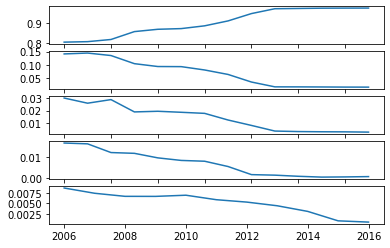

In [25]:
# Plotando a % de solicitacoes por tipo por ano, em subplots para poder compara-los

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
ax1.plot(tipos_ano_df[tipos_ano_df.Tipo == 'Reclamação'].index, tipos_ano_df[tipos_ano_df.Tipo == 'Reclamação']['Contagem'])
ax2.plot(tipos_ano_df[tipos_ano_df.Tipo == 'Pedido de Informação'].index, tipos_ano_df[tipos_ano_df.Tipo == 'Pedido de Informação']['Contagem'])
ax3.plot(tipos_ano_df[tipos_ano_df.Tipo == 'Denúncia'].index, tipos_ano_df[tipos_ano_df.Tipo == 'Denúncia']['Contagem'])
ax4.plot(tipos_ano_df[tipos_ano_df.Tipo == 'Sugestão'].index, tipos_ano_df[tipos_ano_df.Tipo == 'Sugestão']['Contagem'])
ax5.plot(tipos_ano_df[tipos_ano_df.Tipo == 'Elogio'].index, tipos_ano_df[tipos_ano_df.Tipo == 'Elogio']['Contagem'])

Text(0, 0.5, 'Distribuicao do total de tipos')

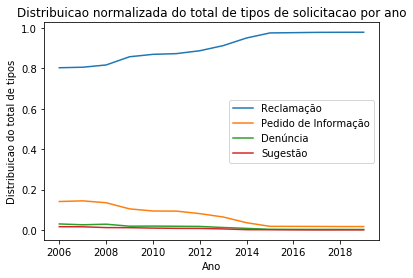

In [26]:
# Plotando todos em um mesmo plot, sem o tipo 'Elogio' que tem um numero muito baixo, para ver se melhora a visualizacao

plt.plot(tipos_ano_df[tipos_ano_df.Tipo == 'Reclamação'].index, tipos_ano_df[tipos_ano_df.Tipo == 'Reclamação']['Contagem'], label='Reclamação')
plt.plot(tipos_ano_df[tipos_ano_df.Tipo == 'Pedido de Informação'].index, tipos_ano_df[tipos_ano_df.Tipo == 'Pedido de Informação']['Contagem'], label='Pedido de Informação')
plt.plot(tipos_ano_df[tipos_ano_df.Tipo == 'Denúncia'].index, tipos_ano_df[tipos_ano_df.Tipo == 'Denúncia']['Contagem'], label='Denúncia')
plt.plot(tipos_ano_df[tipos_ano_df.Tipo == 'Sugestão'].index, tipos_ano_df[tipos_ano_df.Tipo == 'Sugestão']['Contagem'], label='Sugestão')
plt.title("Distribuicao normalizada do total de tipos de solicitacao por ano")
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Distribuicao do total de tipos')

In [27]:
tipos_ano_df[tipos_ano_df.Tipo == 'Pedido de Informação']

,Tipo,Contagem
Ano,,
2006,Pedido de Informação,0.141180
2007,Pedido de Informação,0.144426
2008,Pedido de Informação,0.135143
2009,Pedido de Informação,0.104773
2010,Pedido de Informação,0.094111
2011,Pedido de Informação,0.093688
2012,Pedido de Informação,0.081206
2013,Pedido de Informação,0.064525
2014,Pedido de Informação,0.036174


In [28]:
print('Fatia de Reclamacoes no total de tipo de solicitacoes')
print("\n")
print('2006 ', reclamacao_ano.loc[2006, 'Contagem'], ' ou ', (reclamacao_ano.loc[2006, 'Contagem']*100), '% do total')
print('2019 ', reclamacao_ano.loc[2019, 'Contagem'], ' ou ', (reclamacao_ano.loc[2019, 'Contagem']*100), '% do total')
print("\n")
print('Variacao total e de ', reclamacao_ano.loc[2019, 'Contagem'] - reclamacao_ano.loc[2006, 'Contagem'], \
     ' ou ', (reclamacao_ano.loc[2019, 'Contagem'] - reclamacao_ano.loc[2006, 'Contagem'])*100, '% do total')

Fatia de Reclamacoes no total de tipo de solicitacoes


2006  0.8035454103933949  ou  80.3545410393395 % do total
2019  0.979333946655489  ou  97.9333946655489 % do total


Variacao total e de  0.17578853626209412  ou  17.578853626209412 % do total


In [29]:
ped_info_ano = tipos_ano_df[tipos_ano_df.Tipo == 'Pedido de Informação']
print('Fatia de Pedido de Informação no total de tipo de solicitacoes')
print("\n")
print('2006 ', ped_info_ano.loc[2006, 'Contagem'], ' ou ', (ped_info_ano.loc[2006, 'Contagem']*100), '% do total')
print('2019 ', ped_info_ano.loc[2019, 'Contagem'], ' ou ', (ped_info_ano.loc[2019, 'Contagem']*100), '% do total')
print("\n")
print('Variacao total e de ', ped_info_ano.loc[2019, 'Contagem'] - ped_info_ano.loc[2006, 'Contagem'], \
     ' ou ', (ped_info_ano.loc[2019, 'Contagem'] - ped_info_ano.loc[2006, 'Contagem'])*100, '% do total')

Fatia de Pedido de Informação no total de tipo de solicitacoes


2006  0.14118001708227965  ou  14.118001708227965 % do total
2019  0.01713672910576541  ou  1.713672910576541 % do total


Variacao total e de  -0.12404328797651423  ou  -12.404328797651424 % do total


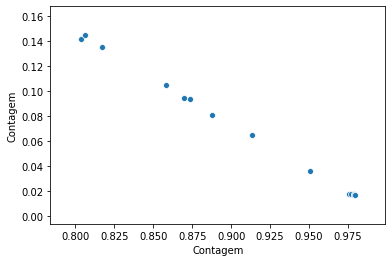

In [30]:
import seaborn as sns
sns.scatterplot(reclamacao_ano.Contagem, ped_info_ano.Contagem)


In [31]:
import numpy as np
r = np.corrcoef(reclamacao_ano.Contagem, ped_info_ano.Contagem)
r[1,0]

-0.9996409123526779

In [32]:
r = np.corrcoef(reclamacao_ano.Contagem, tipos_ano_df[tipos_ano_df.Tipo == 'Denúncia'].Contagem)
r[1,0]

-0.9931157621508678

Analisando os tipos de solicitacoes, vemos que em 2006, o tipo "Reclamacao" representava 80% do total de solicitacoes e em 2019 passou a representar quase a totalidade das solicitacoes feitas, 98%.

Essa analise foi feita apenas com numeros relativos, nao e possivel saber se o numero de reclamacoes subiu ou se os outros tipos cairam.